In [1]:
import create_model
import numpy as np
import os
# Change simulation parameters here
temperature = 25  # in degC, valid values: 0, 10, 25
crate = 1         # valid values: 0.5, 1, 2
cell_selected = ["789"]   # select the cell to optimize

model=create_model.model_build(temperature,crate,cell_selected)

In [2]:

x0 =np.array([5e-14,6.48e-7,20,2.85e3]) # Initial values of parameters
# Create bounds
#max_bound = np.array([ 2.06e-12, 2.18589831e-5,1000,2.85e6])
#min_bound = np.array([ 2.06e-16, 2.18589831e-9,0.1,2.85])

#bounds of the variables as (min,max) {This might need adjustment according to the optimization method.}
bounds = [(2.06e-16,2.06e-12),(2.18589831e-9,2.18589831e-5),(0.1,1000),(2.85, 2.85e6)] 


model.fitness(x0) #initial value of the function

array(0.01547922)

In [6]:
%time # time the solver
from scipy import optimize
minimum = optimize.differential_evolution(model.fitness, bounds, x0=x0)

Wall time: 0 ns


NameError: name 'simulation' is not defined

In [5]:
if __name__ == "__main__":
    %time
    from scipy import optimize
    minimum = optimize.differential_evolution(model.fitness, bounds, x0=x0, workers=-1)
    print(minimum)

Wall time: 0 ns


NameError: name 'simulation' is not defined

In [ ]:
minimum

In [ ]:
print("Initial function value: %s" %model.fitness(x0))

print("Optimized function value: %s" %model.fitness(minimum.x))

print("Optimized values are: %s" %minimum.x)

model.define_model(minimum.x)

model.model_plot()

Initial function value: 0.015479218771271968
Optimized function value: 0.001247804244614363
Optimized values are: [1.81191505e-14 3.20158338e-07 3.48800697e+01 1.95582070e+03]


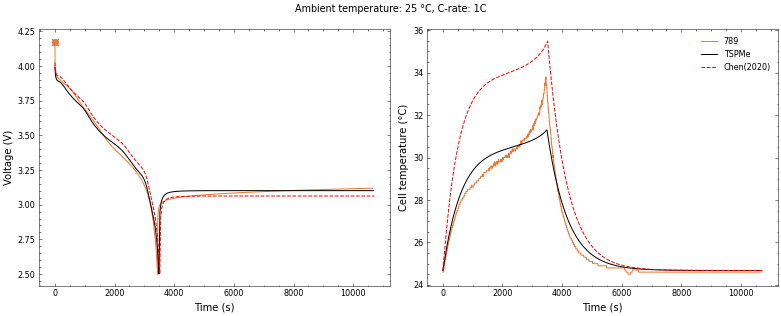

In [7]:

print("Initial function value: %s" %model.fitness(x0))

print("Optimized function value: %s" %model.fitness(np.array([1.81191505e-14, 3.20158338e-07, 3.48800697e+01, 1.95582070e+03])))

print("Optimized values are: %s" %np.array([1.81191505e-14, 3.20158338e-07, 3.48800697e+01, 1.95582070e+03]))

model.define_model(np.array([1.81191505e-14, 3.20158338e-07, 3.48800697e+01, 1.95582070e+03]))

model.model_plot()